# Employee Exit Surveys: Analyzing Job Dissatisfaction
In this project, we investigate due to what reasons short time and long time employees resign and analyse the differences between two groups if any. The study is based on  two data sets both exit surveys conducted by  <span style="color:blue"> * The Department of Education, Training and Employment (DETE) </span> and <span style="color:blue"> * The  Technical and Further Education (TAFE) </span> institute in Queensland.  
    Mainly we look for answers to the following two question:
  *   Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
  * Is age a factor? Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
  * Additionaly, we would like to know if there is a difference between institutions' job dissatisfaction proportions.

### Preliminary Work

In [1]:
# The following Python packages will be employed 
# for Data exploration 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import ChainMap


# To see the output of the graphs in Jupyter Notebook
%matplotlib inline

# We import this library to see all outputs of a cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Disable warnings: there are no critical ones
import warnings
warnings.filterwarnings('ignore')

# Read the datasets in .csv format into Pandas dataframe
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')



### Exploring Dataframes

In [2]:
# DETE dataframe
dete_survey.info()
dete_survey.head(2)
dete_survey.tail(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,Not Stated,Not Stated,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

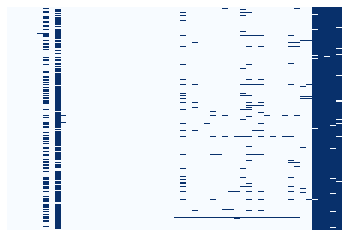

In [3]:
# Check for missing values in dete dataframe and visualize positions
dete_survey.isnull().sum()
sns.heatmap(dete_survey.isnull(),cbar=False, cmap='Blues',\
           xticklabels=False, yticklabels=False)


From the above two observations, it is obvious that some columns and rows in DETE dataset contain too many NaN values that need to be dropped, filled or cleaned  for better data analysis.


In [4]:
# TAFE dataset
tafe_survey.info()
tafe_survey.head(2)
tafe_survey.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,No,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2
701,6.350730e+17,Tropical North Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,-,Career Move - Self-employment,-,-,...,Yes,Yes,Yes,Yes,Female,26 30,Contract/casual,Administration (AO),3-4,1-2


Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

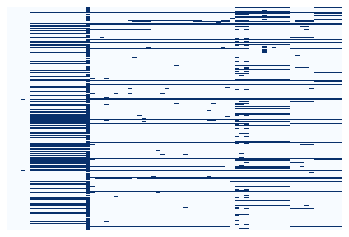

In [5]:
# Check for missing values in dete dataframe and visualize positions
tafe_survey.isnull().sum()
sns.heatmap(tafe_survey.isnull(),cbar=False, cmap='Blues',\
            xticklabels=False, yticklabels=False)


#### First Observations
* The two datasets dete and tafe have different number of columns 65 and 72 respectively. 
* There are too many missing values in certain columns and rows that we need to clean, drop or fill by an appropriate way.
* The column names in datasets are required to be standardized before combining them. 
* A substantial number of irrelevant columns should be dropped from both datasets.

In [6]:
# for dete dataframe
# Change "Not Stated" values to NaN 
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')

# drop unnecessary columns and rename as dete_survey_updated
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

# check for changes
dete_survey_updated.info()
dete_survey_updated.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
# for tafe dataframe
# drop unnecessary columns and rename as tafe_survey_updated
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

# check for changes
tafe_survey_updated.info()
tafe_survey_updated.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


To clean the data,
*  We have replaced 'Not Stated' values by NaN in dete dataframe to handle missing values more efficiently.
*  Dropped irrelavant columns for our analysis from both dataframes because our aim is to identify reasons for resignation.

#### Renaming Column Names
Because we eventually want to combine both datasets, we'll have to standardize the column names. Especially columns in both datasets with identical meaning, but named differently, have to be tackled prior to our analysis.


In [8]:
# Rename the dete dataframe columns
dete_survey_updated.columns=\
dete_survey_updated.columns.str.strip().\
str.lower().str.replace('\s+', '_')

# Examine for the changes
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
# Rename the tafe dataframe columns
tafe_survey_updated.rename(columns=\
                           {'Record ID': 'id','CESSATION YEAR': 'cease_date',\
                            'Reason for ceasing employment': 'separationtype',\
                            'Gender. What is your Gender?': 'gender',\
                            'CurrentAge. Current Age': 'age',\
                            'Employment Type. Employment Type': 'employment_status',\
                            'Classification. Classification': 'position',\
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',\
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},\
                             inplace=True)

# Examine for the changes
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

_ The following changes are made to the datasets: _
* We standardized column names of DETE dataset.
* Renamed some of the column names in TAFE dataset so that two datasets can be concatenated later. 

Our end goal is to find due to what kind of dissatisfaction employees resigned. Hence it is a good starting point to check values in the * "separationtype" * columns in each dataframe.

In [10]:
# DETE separation types
dete_survey_updated['separationtype'].value_counts(dropna=False)


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
# DETE separation types
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

<span style="color:red"> ** __ Note that in tafe datframe in seperation column one value is missing that needs to be dropped!.. __ ** </span>


Since we only need data with Resignation for our analysis, a new sub-dataframe will be formed from the dataframes by selecting rows containing  the word "Resignation" in the separationtype column. 

In [12]:
# Filter out resignation data from DETE survey 
# and assign it to a new dataframe called dete_resignations
resig_reason_dete=dete_survey_updated.separationtype.str.contains('Resignation')
dete_resignations=dete_survey_updated[resig_reason_dete]

# Test out if the data is correct
dete_resignations["separationtype"].value_counts(dropna=False)
print('\n')
dete_resignations.info()


Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64



<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null object
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envi

In [13]:
# Filter out resignation data from DETE survey 
# and assign it to a new dataframe called dete_resignations
resig_reason_tafe=tafe_survey_updated['separationtype']=='Resignation'
tafe_resignations=tafe_survey_updated[resig_reason_tafe]

# Test out if the data is correct
tafe_resignations["separationtype"].value_counts(dropna=False)
print('\n')
tafe_resignations.info()

Resignation    340
Name: separationtype, dtype: int64



<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-nul

For this study, we focus on data as "Resignation" being separation reason so two sub dataframes have been created by selecting rows containing only Resignation as reason of separation by filtering out seperationtype column.


### Detecting Unusual Data
In this step, we will check if the data contains any unreasonable entries by listing unique values in certain columns and remove them.

In [14]:
# Values in the cease_date column
dete_resignations['cease_date'].value_counts(dropna=False)


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

The dates make sense. The only issue, some of them in yyyy format but others in mm/yyyy format. We will extract only years and convert the type to float. 

In [15]:
# Extract the year and convert it to float type
dete_resignations["cease_date"] = \
(dete_resignations.copy())["cease_date"].\
str[-4:].astype(float)



In [16]:
# Check if the data is reasonable
dete_resignations["cease_date"].value_counts(dropna=False).sort_index()

 2006.0      1
 2010.0      2
 2012.0    129
 2013.0    146
 2014.0     22
NaN         11
Name: cease_date, dtype: int64

All cease dates seem to be reasonable. Now let's look at the dete_start_date column in the DETE survey and at the cease_date column in the TAFE survey to see if there is something unusual in the data.

In [17]:
# Check if the data makes sense
dete_resignations['dete_start_date'].\
value_counts(dropna=False).sort_index()
print('*************************************************')
print('*************************************************')
tafe_resignations['cease_date'].value_counts().sort_index()

 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64

*************************************************
*************************************************


2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

There is no unexpected data so far. With the help of a boxplot, outliers can be identified in numerical columns.
Let us employ data visualization to detect strange data if any.

In [18]:
# DETE: List of numerical columns
dete_resignations.select_dtypes(include='float').columns
# Check if the data makes sense
dete_resignations.role_start_date.value_counts().sort_index()
dete_resignations=\
dete_resignations[dete_resignations.role_start_date!=200.0]
dete_resignations.role_start_date.value_counts().sort_index()

Index(['cease_date', 'dete_start_date', 'role_start_date'], dtype='object')

200.0      1
1976.0     2
1980.0     1
1982.0     1
1986.0     1
1987.0     2
1988.0     3
1989.0     5
1990.0     1
1991.0     1
1992.0     4
1993.0     3
1994.0     2
1996.0     3
1997.0     5
1998.0     4
1999.0     6
2000.0     1
2001.0     2
2002.0     7
2003.0     6
2004.0    10
2005.0     9
2006.0     7
2007.0    24
2008.0    21
2009.0    18
2010.0    27
2011.0    33
2012.0    37
2013.0    24
Name: role_start_date, dtype: int64

1976.0     2
1980.0     1
1982.0     1
1986.0     1
1987.0     2
1988.0     3
1989.0     5
1990.0     1
1991.0     1
1992.0     4
1993.0     3
1994.0     2
1996.0     3
1997.0     5
1998.0     4
1999.0     6
2000.0     1
2001.0     2
2002.0     7
2003.0     6
2004.0    10
2005.0     9
2006.0     7
2007.0    24
2008.0    21
2009.0    18
2010.0    27
2011.0    33
2012.0    37
2013.0    24
Name: role_start_date, dtype: int64

<span style="color:red"> ** __ The role_start_date column has unusual min value 200 !.. __ ** </span>
We removed the row with the unusual value!..


(1976.0, 2013.0)

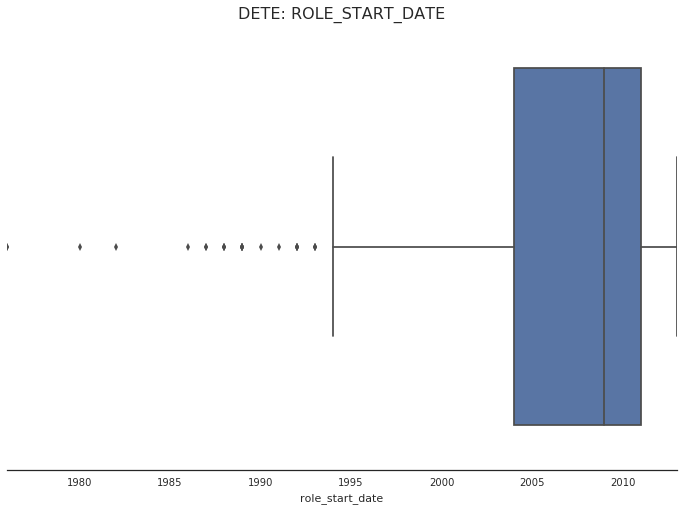

In [19]:
# Boxplot DETE role_start_date column
plt.figure(figsize=(12, 8))
sns.set_style("white")
box_plot = sns.boxplot(dete_resignations['role_start_date'])


# Plot aesthetics
plt.title(str.upper('dete: role_start_date') , fontsize=16)
#plt.xlabel("Start Year", fontsize=13)
plt.xlim(dete_resignations['role_start_date'].min(), dete_resignations['role_start_date'].max())

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

In [20]:
# TAFE: List of numerical columns
tafe_resignations.select_dtypes(include='float').columns

# Check if the data makes sense
tafe_resignations.cease_date.value_counts().sort_index()

Index(['id', 'cease_date'], dtype='object')

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

(2009.0, 2013.0)

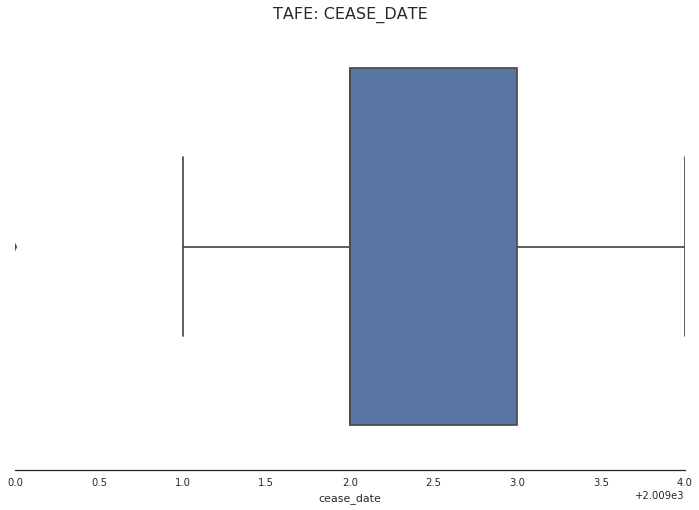

In [21]:
# Boxplot DETE role_start_date column
plt.figure(figsize=(12, 8))
sns.set_style("white")
box_plot = sns.boxplot(tafe_resignations['cease_date'])


# Plot aesthetics
plt.title(str.upper('TAFE: cease_date') , fontsize=16)
#plt.xlabel("Start Year", fontsize=13)
plt.xlim(tafe_resignations['cease_date'].min(), tafe_resignations['cease_date'].max())

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

__ We have checked the columns with numerical data for unusual values and removed them. Also verified that there aren't any major issues with the years by drawing boxplots. __

####  New DETE Column: Institute_service
One of our aims is to look for an association between institute service length and job dissatisfaction.
In order to answer this question we need to calculate the period an employee was in service.  
In the TAFE survey we already have the column called institute_service that contains years of service at a company.
In the DETE survey, only dete_start_date and cease_date data are available.
In order to combine the datasets, we need to create a corresponding column in dete dataset. We will solve this issue by subtracting dete_start_date from the cease_date and assign the result to a new column named institute_service.

In [22]:
#DETE: create institute_service column
dete_resignations['institute_service']=\
dete_resignations['cease_date']-dete_resignations['dete_start_date']

# check values in new column
dete_resignations['institute_service'].value_counts(dropna=False).sort_index()

 0.0     20
 1.0     22
 2.0     14
 3.0     20
 4.0     16
 5.0     23
 6.0     17
 7.0     13
 8.0      8
 9.0     14
 10.0     6
 11.0     4
 12.0     6
 13.0     7
 14.0     6
 15.0     7
 16.0     5
 17.0     6
 18.0     5
 19.0     3
 20.0     7
 21.0     3
 22.0     6
 23.0     4
 24.0     4
 25.0     2
 26.0     2
 27.0     1
 28.0     2
 29.0     1
 30.0     2
 31.0     1
 32.0     3
 33.0     1
 34.0     1
 35.0     1
 36.0     2
 38.0     1
 39.0     3
 41.0     1
 42.0     1
 49.0     1
NaN      38
Name: institute_service, dtype: int64

To make two dataframes consistent for concatenation, we have added institute_service column to the dete dataframe by subtracting dete_start_date column from cease_date.

### Dissatisfaction Column

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.
1. For tafe_survey_updated:
   * Contributing Factors. Dissatisfaction
   * Contributing Factors. Job Dissatisfaction
2. For detesurveyupdated:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column named 'dissatisfied'. To accomplish this, we first will create a function to convert related columns data type to boolean. Finally we'll use the DataFrame.any() method to add the new column which will be the indicator of dissatisfaction.

Let's look at the values in both columns in tafe_resignations dataframe.

In [23]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [24]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [25]:
# If the value is NaN, return np.nan.
# If the value is "-", return False. Since there are already some missing values, we can't treat hyphens as NaN values.
# For other values, return True.

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True


In [26]:
# Create a copy
tafe_resignations_up=tafe_resignations.copy()
# Apply update_vals function to related columns
tafe_resignations_up["Contributing Factors. Dissatisfaction"] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations_up["Contributing Factors. Job Dissatisfaction"] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

# Create a new column called dissatisfied by using df.any() method
tafe_resignations_up["dissatisfied"] = tafe_resignations_up[[
    "Contributing Factors. Dissatisfaction",
    "Contributing Factors. Job Dissatisfaction"
]].any(axis=1, skipna=False)

In [27]:
# Check the values in the new column.
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

The columns relavant to dissatisfaction in dete_resignations dataframe are of boolean type so we can use df.any() method without making any changes.

In [28]:
# Temp values to be copied to the dissatisfied column
tmp=dete_resignations[['job_dissatisfaction',\
                         'dissatisfaction_with_the_department',\
                         'physical_work_environment',\
                         'lack_of_recognition',\
                         'lack_of_job_security',\
                         'work_location',\
                         'employment_conditions',\
                         'work_life_balance',\
                         'workload'\
                        ]].any(axis=1, skipna=False)

# Create a copy to avoid the SettingwithCopy warning
dete_resignations_up=dete_resignations.copy()

# Create a new column called dissatisfied
dete_resignations_up['dissatisfied']=tmp

In [29]:
# Check the values in the new column.
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    161
True     149
Name: dissatisfied, dtype: int64

To identify people with job dissatisfaction as reason for resignment, we wrote a simple function 'update_vals' to be applied to certain columns related to job satisfaction. By using df.apply() and df.any() methods we are able to determine employees who quitted job due to dissatisfaction and it turns out to be 149 and 91 for DETE and TAFE surveys respectively.

### Concatenation: DETE and TAFE
For our final analysis, we shoold combine the dataframes.
First, let's add a _"institute"_ column to each dataframe that will allow us to easily distinguish between the two.


In [30]:
# Add institute column to both dataframes.
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [31]:
# Combine the dataframes containing only common columns
# by setting join parameter to "inner".
combined=pd.concat([dete_resignations_up,tafe_resignations_up],join="inner")

#Drop the columns containing less than 500 values
combined_updated=combined.dropna(axis=1,thresh=500)

In [32]:
combined_updated.info()
combined.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 3 to 701
Data columns (total 10 columns):
id                   650 non-null float64
separationtype       650 non-null object
cease_date           634 non-null float64
position             597 non-null object
employment_status    596 non-null object
gender               591 non-null object
age                  595 non-null object
institute_service    562 non-null object
dissatisfied         642 non-null object
institute            650 non-null object
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


To distinguish two datasets, we have created a new column called "institution" in both before combining them and we finally combined two dataframes into "combined_updated" dataframe and dropped irrelevant columns for our analysis.

#### Further cleaning: institute_service
For our study, institute service length plays a crutial role but the values are inconsistent. So we will clean and categorize the data with the help of a new function called 'new_category' and Series.apply() method.  

In [33]:
# Let's have a look at values in 'institute_service' column.
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   7
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [34]:
# The function returns 
# New: Less than 3 years at a company
# Experienced: 3-6 years at a company
# Established: 7-10 years at a company
# Veteran: 11 or more years at a companyNaN, Depending on the service length

def new_category(val):
    if pd.isnull(val):
        return np.nan
    elif (val in ['Less than 1 year','1-2']):
        return 'New'
    elif (val in ['3-4','5-6']):
        return('Experienced')
    elif (val in ['7-10']): 
        return 'Established'
    elif (val in ['More than 20 years','11-20']):
        return 'Veteran'
    elif (float(val)<3.0):
        return 'New'
    elif (float(val)<=6.0):
        return('Experienced')
    elif (float(val)<=10.0):
        return 'Established'
    else:
        return 'Veteran'
    

In [35]:
# Apply "new_category" function to categorize 
# 'institute_service' column and 
tmp=combined_updated['institute_service'].apply(new_category)

# Create a copy of combined_updated dataframe to avoid the SettingwithCopy warning
combined_up=combined_updated.copy()

# Add 'service_cat' column
combined_up['service_cat']=tmp

# Check values in 'service_cat' column
tmp.value_counts(dropna=False)

New            193
Experienced    172
Veteran        135
NaN             88
Established     62
Name: institute_service, dtype: int64

The institute_service coulumn contains values in a couple different forms so we categorize them as new, experienced, established and veteran depending on the time they work at the institution and constructed a new column as 'service-cat' by defining a function called new_category and applying to the institute_service coulumn.

### Data Analysis
Now we are ready to answer the first question:
* Is there any association between the service length and job dissatisfaction?


We will  first use the DataFrame.fillna() method to replace the missing values in the dissatisfied column with the value that occurs most frequently in this column, either True or False.

With the help of the DataFrame.pivot_table() method,  the percentage of dissatisfied employees in each service_cat group will be calculated.




In [36]:
# Examine the number of True, False and NaN values in the dissatisfied column.
combined_up['dissatisfied'].value_counts(dropna=False)

False    402
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [37]:
# Fill missing values with the mode of the column.
combined_up['dissatisfied'].\
fillna(False,inplace=True)

# Verify changes.
combined_up['dissatisfied'].value_counts(dropna=False)

False    410
True     240
Name: dissatisfied, dtype: int64

In [38]:
# Calculate the percentage of dissatisfied employees 
# in each service_cat group.
diss_perc_service_cat=combined_up.pivot_table\
(values='dissatisfied',index='service_cat')

# Look at values in the pivot table.
diss_perc_service_cat

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.488889


([], <a list of 0 Text yticklabel objects>)

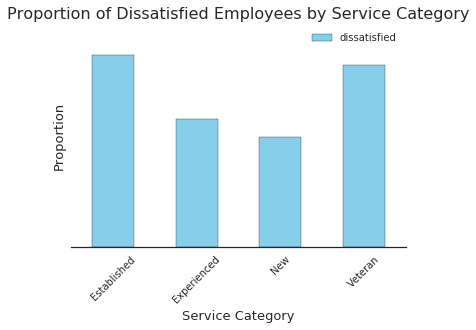

In [39]:
ax=diss_perc_service_cat.plot.bar(y="dissatisfied",rot=45,color="skyblue")
plt.title("Proportion of Dissatisfied Employees by Service Category", fontsize=16)
plt.xlabel("Service Category", fontsize=13)
plt.ylabel("Proportion", fontsize=13)
plt.yticks([])

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

From both the pivot table and bar graph, we see that there is a strong positive correlation between the service length and dissatisfaction. 

### Age vs Job Dissatisfaction 

Now we look for an answer to the second question:

  * Is age a factor? Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
  
Here,we investigate the correlation between age groups and dissatisfaction proportion. To do so, we dropped all rows with missing data since many of them appeared to be in certain rows and then values in age column have been cleaned. We categorized age groups in a new age_cat column as young(age<35), middle-aged(age<56) and old(age>=56).
With the help of df.pivot_table() method, association between age groups and dissatisfaction is established and visualized by df.plot() bar graph. 

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          0
institute             0
service_cat          88
dtype: int64

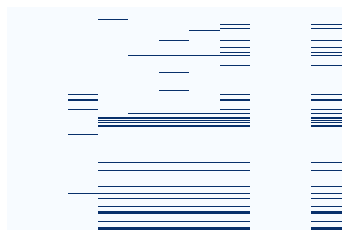

In [40]:
# Check for missing values.
combined_up.isnull().sum()
sns.heatmap(combined_up.isnull(),cbar=False, cmap='Blues',\
           xticklabels=False, yticklabels=False)

In [41]:
# Drop rows with missing age value
combined_no_nan=combined_up.dropna()

# Categorize age groups as young, middle aged and old.
L1 = ['20-or-younger', '21-25', '26-30','31-35']
L2 = ['36-40','41-45','46-50','51-55']
L3 = ['56-or-older','61-or-older','56-60']

# Use ChainMap to map values to their category.
d = ChainMap(dict.fromkeys(L1, 'young'), dict.fromkeys(L2, 'middle-aged'),dict.fromkeys(L3, 'old'))

# Apply d-chainmap to 'age' column
cats = combined_no_nan['age'].str.strip().str.replace('\s+','-').map(d.get)

# Create new age_cat column
combined_no_nan_up=combined_no_nan.copy()
combined_no_nan_up['age_cat']=cats

# Look at the values in age categories
combined_no_nan_up['age_cat'].value_counts(dropna=False)


middle-aged    293
young          192
old             65
Name: age_cat, dtype: int64

In [42]:
# Calculate the proportion of dissatisfied employees 
# in each age_cat group.
age_vs_diss=combined_no_nan_up.pivot_table(values='dissatisfied',index='age_cat')
age_vs_diss

,dissatisfied
age_cat,
middle-aged,0.392491
old,0.415385
young,0.354167


([], <a list of 0 Text yticklabel objects>)

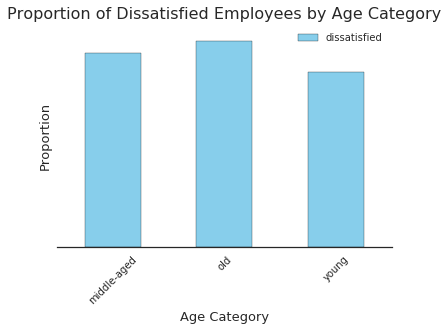

In [43]:
ax=age_vs_diss.plot.bar(y="dissatisfied",rot=45,color="skyblue")
plt.title("Proportion of Dissatisfied Employees by Age Category", fontsize=16)
plt.xlabel("Age Category", fontsize=13)
plt.ylabel("Proportion", fontsize=13)
plt.yticks([])

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

We observe that as employees get older the dissatisfaction ratio slightly increases.

### Job Dissatisfaction by Institution
Additionally, we would like to know if there is a difference between institutions' job dissatisfaction proportions. 
Since 'dissatisfied' and 'institution' columns have no missing values, we can aggregated the data by using df.pivot_table() method.

In [44]:
# Calculate the proportion of dissatisfied employees 
# in the institutions DETE and TAFE.
inst_vs_diss=combined_up.pivot_table(values='dissatisfied',index='institute')
inst_vs_diss


,dissatisfied
institute,
DETE,0.480645
TAFE,0.267647


It is clear that employees at DETE are more likely to be unhappy with their job compared to those working at TAFE.

## Conclusions
In this project, we analyzed two exit surveys done by the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We have looked for answers to the following questions:

  *   Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
  * Is age a factor? Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
  * Additionaly, we would like to know if there is a difference between institutions' job dissatisfaction proportions.



Based on the surveys and our study, we conclude that:

* New employees on average are more satisfied than more experienced employees. 
* Job satisfaction between age groups differ slightly, older employees are less satisfied with their jobs. 
* People working at The Department of Education, Training and Employment (DETE) are more likely to be unhappy with their jobs than those working at The Technical and Further Education (TAFE) institute in Queensland, Australia.